In [1]:
from ingest import TextEmbedder
import numpy as np
import pandas as pd

import re
import tf_keras

/home/uy/rag_pipeline/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-27 17:15:27.229932: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732702527.247265   43297 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732702527.253762   43297 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-27 17:15:27.278928: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical o

In [2]:
df = pd.read_csv("viblo_data.csv")
df = df.drop(columns=['URL','Title'])
df

,Unnamed: 0,Plot
0,0,🌐 Viblo Talk 2024 đã trở lại với chủ đề Cyber ...
1,1,Bạn đang làm việc trong ngành CNTT và mong muố...
2,2,Redis là một kho lưu trữ key-value hiệu suất c...
3,3,"Là một lập trình viên, bạn không thể lường trư..."
4,4,"Sau một thời gian viết blog, đã có hơn 28,000 ..."
...,...,...
95,95,Hôm nay mình đã thử tự code lại Promise trong ...
96,96,Tableau\nTableau là một trong những công cụ ph...
97,97,Xin chào mọi người.\nKhi chúng ta đếm các bản ...
98,98,Cài đặt gói\nyarn add react-onesignal\nvới ver...


In [3]:
def split_para_to_sentence(para):
    sentences = re.split(r'(?<=[.])\s+',para)
    return sentences

In [4]:
split_para_to_sentence(df['Plot'][0])

['🌐 Viblo Talk 2024 đã trở lại với chủ đề Cyber & AI: Lập trình an toàn thời AI.',
 'Là sự kiện công nghệ đặc biệt dành cho cộng đồng Viblo, năm nay Viblo Talk đem đến cho các lập trình viên, kỹ sư và chuyên gia bảo mật nội dung về việc kết hợp các phương pháp bảo mật thông tin trong lập trình để nâng cao nhận thức và kỹ năng về an ninh mạng trong kỷ nguyên phát triển mạnh mẽ của AI.',
 'Viblo tin chắc rằng, đây là một topic vô cùng nóng hổi, có nhiều khía cạnh và góc nhìn khác nhau để chúng ta cùng tham gia thảo luận.',
 '🔍 Sự kiện này có gì đặc biệt?\nTổng quan về AI và tác động đến Công nghệ thông tin: Hiểu rõ hơn về sự phát triển và ảnh hưởng của AI đến ngành công nghệ và các quy trình phát triển phần mềm.',
 'Chiến lược an ninh thông tin trong kỷ nguyên AI: Khám phá những phương pháp tiên tiến và các chuẩn mực cần thiết để bảo vệ dữ liệu và sản phẩm trước các rủi ro an ninh trong môi trường AI dưới nhiều góc nhìn khác nhau.',
 'Phân tích Case Study và Tình huống giả định: Thực tế 

In [5]:
from langchain.embeddings import HuggingFaceBgeEmbeddings
embeddings = HuggingFaceBgeEmbeddings(model_name="BAAI/bge-large-en-v1.5")

In [6]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def create_semantic_chunks(sentences):
    sen_embeddings = [np.array(embeddings.embed_query(sentence)).reshape(1, -1) for sentence in sentences]
    semantic_chunks = []
    for i in range(len(sentences)):
        if i == 0:
            semantic_chunks.append([sentences[i]])
        else:
            similarity = cosine_similarity(sen_embeddings[i-1], sen_embeddings[i])
            if similarity[0][0] > 0.6:
                semantic_chunks[-1].append(sentences[i])
            else:
                semantic_chunks.append([sentences[i]])
    return semantic_chunks

In [7]:
sentences = split_para_to_sentence(df['Plot'][7])

In [9]:
chunks = create_semantic_chunks(sentences)
chunks

[['Choosing the right VPN can save you money while keeping your data secure.',
  "Let's examine how Surfshark and NordVPN stack up against each other.",
  'Price Breakdown & Value\nSurfshark catches attention with its budget-friendly plans, offering the Starter package at €1.99/month with a 24-month commitment.'],
 ['They sweeten the deal by adding 4 bonus months to long-term subscriptions.'],
 ['NordVPN positions itself in a slightly higher price bracket, with their Basic plan starting at €3.59/month for a 2-year subscription.'],
 ['They include 3 extra months with extended plans.'],
 ['While pricier, NordVPN packs additional features into their service tiers.',
  "Service Tiers & Features\nNordVPN's Package Structure:\nBasic: Standard VPN features\nPlus: Adds blocking tools, password manager, malware shield\nUltimate: Includes 1TB cloud storage, €5K cyber insurance coverage\nSurfshark's Offerings:\nStarter: Core VPN protection\nOne: VPN + antivirus bundle\nOne+: Full security suite w

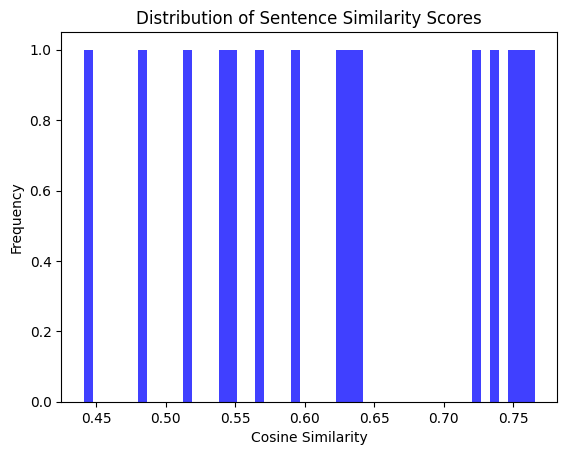

In [22]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Example: Calculate and plot similarity scores
similarities = []
sen_embeddings = [np.array(embeddings.embed_query(sentence)).reshape(1, -1) for sentence in sentences]

for i in range(1, len(sen_embeddings)):
    sim = cosine_similarity(sen_embeddings[i - 1], sen_embeddings[i])[0][0]
    similarities.append(sim)

# Plot histogram
plt.hist(similarities, bins=50, alpha=0.75, color='blue')
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Similarity Scores")
plt.show()


In [10]:
len(chunks)

8

In [11]:
chunks[2]

['NordVPN positions itself in a slightly higher price bracket, with their Basic plan starting at €3.59/month for a 2-year subscription.']

In [ ]:
API_URL = "http://localhost:8080/embed"
    
DB_CONFIG = {
    "database": "vectordb",
    "user": "postgres",
    "password": "password",
    "host":"127.0.0.1",
    "port": 5432
}
TABLE_NAME = "text_embeddings"
VECTOR_DIMENSION = 1024  

embedder = TextEmbedder(API_URL, DB_CONFIG)
embedder.ingest_to_db(df, TABLE_NAME, VECTOR_DIMENSION)